# Linear Regression线性回归原理

## 1. 原理

### 1.1 问题引入

#### 1.1.1 一元线性回归

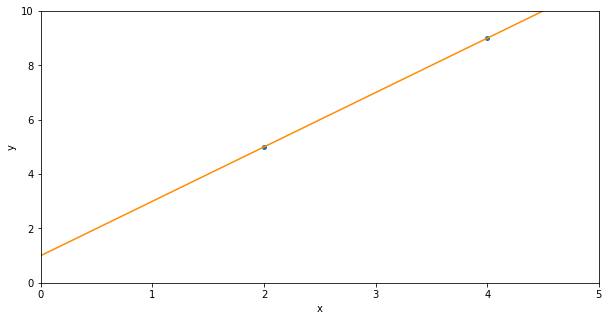

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

x = [2, 4]
y = [5, 9]

plt.figure(figsize=[10, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 5))
plt.ylim((0, 10))
plt.scatter(x, y, s=16)
plt.plot([0, 5], [1, 11], color="darkorange")
plt.show()

已知点A(2, 7)和点B(4, 9)在直线L上，求直线L的线性函数：$f(x) = wx + b$ 的参数 $w$ 和 $b$ 

将点A、B坐标代入直线函数，解方程组
$ \left\{
\begin{aligned}
2w+b=5 \\
4w+b=9
\end{aligned}
\right.
$，得$w=2, b=1$


**问题升级**

样本数据存在噪声 $\epsilon$ ：  
$f(x) = wx+b$  
$y - f(x) = \epsilon$，如何求解？

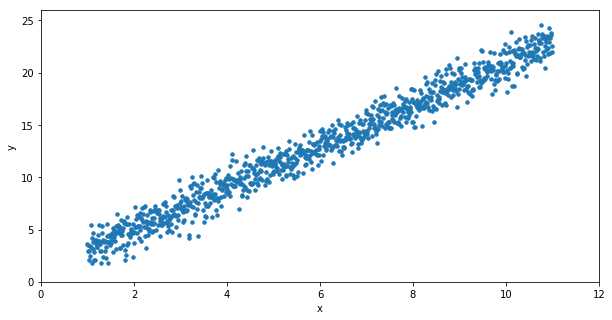

In [2]:
import numpy as np
x = np.arange(1, 11, 0.01)
noise = np.random.randn(1000)
y = 2 * x + 1 + noise
plt.figure(figsize=[10, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 12))
plt.ylim((0, 26))
plt.scatter(x, y, s=12)
plt.show()

#### 1.1.2 多元线性回归

$f(x_i)=w_{1}x_{i1} + w_{2}x_{i2} + ... + w_{d}x_{id} + b$

向量形式：$f(x_i) = W^T x_i + b$

e.g: $f_{颜值}(x) = 0.3·x_{身高} + 0.7·x_{五官} + 0.5·x_{胸围} + 0.6·x_{衣品} +\ ...\ + 0.6·x_{气质} + 5$

### 1.2 求解

#### 1.2.1 最小二乘法

找出最佳参数，使得数据与实际数据之间误差的平方和为最小。  
即 **残差平方和的总和最小化**  
**几何意义**： 使预测值和真实值的欧式距离之和最小

##### 1.2.1.1 问题定义

给定数据集$D=\left\{\left(\boldsymbol{x}_{1}, y_{1}\right),\left(\boldsymbol{x}_{2}, y_{2}\right), \ldots,\left(\boldsymbol{x}_{m}, y_{m}\right)\right\}$，其中$\boldsymbol{x}_{i}=\left(x_{i 1}\right. \left.x_{i 2} ; \ldots ; x_{i d}\right), y_{i} \in \mathbb{R}$。  
线性回归试图学得： $f\left(x_{i}\right)=w x_{i}+b$，使得 $f\left(x_{i}\right) \simeq y_{i}$  

##### 1.2.1.2 基本求解

采用SSE（Sum of Squares Error）计算预测值 $f(x_i)$ 和 $y_i$ 之间的误差 

**一、 目标函数（损失函数Loss function、代价函数cost function）**:  
> $\begin{aligned} J(w, b) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} \end{aligned}$   
> 求使得目标函数 $J(w, b)$ 取最小值的 $w$ 、 $b$   
> $\begin{aligned} (w^{*}, b^{*}) &=\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} \\ &=\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(y_{i} - w x_{i}-b\right)^{2} \end{aligned}$  

**二、 对 $w$ 求偏导** ：  
$\begin{aligned} \frac{\partial J({w}, {b})}{\partial {w}} &=\frac{\partial}{\partial {w}}\left[\sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right)^{2}\right] \\ &=\sum_{{i}=1}^{{m}} \frac{\partial}{\partial {w}}\left[\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right)^{2}\right] \\ &=\sum_{{i}=1}^{{m}}\left[2 \cdot\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right) \cdot\left(-{x}_{{i}}\right)\right] \\ &=\sum_{{i}=1}^{{m}}\left[2 \cdot\left({w} {x}_{{i}}^{2}-{y}_{{i}} {x}_{{i}}+{b} {x}_{{i}}\right)\right] \\ &=2 \cdot\left({w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}+{b} \sum_{{i}=1}^{{m}} {x}_{{i}}\right) \\ &=2\left({w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\sum_{{i}=1}^{{m}}\left({y}_{{i}}-{b}\right) {x}_{{i}}\right)  \end{aligned}$

**三、 对 $b$ 求偏导** ：  
$\begin{aligned} \frac{\partial {J}{({w}, {b})}}{\partial {b}} &=\frac{\partial}{\partial {b}}\left[\sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right)^{2}\right] \\ &=\sum_{{i}=1}^{{m}} \frac{\partial}{\partial {b}}\left[\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right)^{2}\right] \\ &=\sum_{{i}=1}^{{m}}\left[2 \cdot\left({y}_{{i}}-{w} {x}_{{i}}-{b}\right) \cdot(-1)\right] \\ &=\sum_{{i}=1}^{{m}}\left[2 \cdot\left({b}-{y}_{{i}}+{w} {x}_{{i}}\right)\right] \\ &=2 \cdot\left[\sum_{{i}=1}^{{m}} {b}-\sum_{{i}=1}^{{m}} {y}_{{i}}+\sum_{{i}=1}^{{m}} {w} {x}_{{i}}\right] \\ &=2\left({mb}-\sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}\right)\right) \end{aligned}$

**四、 令$\begin{aligned} \frac{\partial J(w, b)}{\partial w} = 0 \end{aligned}$** ：  

$\begin{aligned} 0={w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\sum_{{i}=1}^{{m}}\left({y}_{{i}}-{b}\right) {x}_{{i}} \end{aligned}$  
$\begin{aligned} {w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}=\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}-\sum_{{i}=1}^{{m}} {bx}_{{i}} \end{aligned}$   


> 令$\begin{aligned} \frac{\partial J(w, b)}{\partial b}=0 \end{aligned}$ 得：  
> $\begin{aligned} {b}=\frac{1}{{m}} \sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}\right) \end{aligned}$  
> 因为 $\begin{aligned} \frac{1}{{m}} \sum_{{i}=1}^{{m}} {y}_{{i}}=\overline{{y}}, \frac{1}{{m}} \sum_{{i}=1}^{{m}} {x}_{{i}}=\overline{{x}} \end{aligned}$  
> 所以 $\begin{aligned} {b}=\overline{{y}}-{w} \overline{{x}} \end{aligned}$， 代入上式得：  

$\begin{aligned} {w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}=\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}-\sum_{{i}=1}^{{m}}(\overline{{y}}-{w} \overline{{x}}) {x}_{{i}} \end{aligned}$  
$\begin{aligned} {w} \sum_{{i}=1}^{{m}} {x}_{{i}}^{2}=\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}-\overline{{y}} \sum_{{i}=1}^{{m}} {x}_{{i}}+{w} \overline{{x}} \sum_{{i}=1}^{{m}} {x}_{{i}} \end{aligned}$  
$\begin{aligned} {w}\left(\sum_{{i}=1} {x}_{{i}}^{2}-\overline{{x}} \sum_{{i}=1}^{{m}} {x}_{{i}}\right)=\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}-\overline{{y}} \sum_{{i}=1}^{{m}} {x}_{{i}} \end{aligned}$  
$\begin{aligned} {w}=\frac{\sum_{{i}=1}^{{m}} {y}_{{i}} {x}_{{i}}-\overline{{y}} \sum_{{i}=1}^{{m}} {x}_{{i}}}{\sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\overline{{x}} \sum_{{i}=1}^{{m}} {x}_{{i}}} \end{aligned}$    

> 由于 $\begin{aligned}
\bar{y} \sum_{i=1}^{m} x_{i}=\frac{1}{m} \sum_{i=1}^{m} y_{i} \sum_{i=1}^{m} x_{i}=\bar{x} \sum_{i=1}^{m} y_{i}
\end{aligned}$，  
> $\begin{aligned}
\overline{{x}} \sum_{{i}=1}^{{m}} {x}_{{i}}=\frac{1}{{m}} \sum_{{i}=1}^{{m}} {x}_{{i}} \sum_{{i}=1}^{{m}} {x}_{{i}}=\frac{1}{{m}}\left(\sum_{{i}=1}^{{m}} {x}_{{i}}\right)^{2}
\end{aligned}$  
代入上式得  

求得 $w$ 和 $b$ 最优解的**闭式解**（closed-form）：  

$\begin{aligned}
{w^*}=\frac{\sum_{{i}=1}^{{m}} {y}_{{i}}\left({x}_{{i}}-\overline{{x}}\right)}{\sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\frac{1}{{m}}\left(\sum_{{i}=1}^{{m}} {x}_{{i}}\right)^{2}}
\end{aligned}$  

$\begin{aligned} {b^*}=\frac{1}{{m}} \sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}\right) \end{aligned}$  

##### 1.2.1.3 向量求解

将 $b$ 纳入 $w$，记作$\hat{\boldsymbol{w}}$ :   

$\begin{aligned}
\hat{\boldsymbol{w}}=(\boldsymbol{w } ; b)
\end{aligned}$  

即 $f(x_i) = x_{i1}w_1 + x_{i2}w_2 +\ ...\ + x_{id}w_d + 1 · w_{d+1}$   


将 $x$ 也写成向量形式，并扩展一列填充为 $1$ ，记作 $X$ : 
  
$\begin{equation}
\mathbf{X}=\left(\begin{array}{ccccc}
x_{11} & x_{12} & \ldots & x_{1 d} & 1 \\
x_{21} & x_{22} & \ldots & x_{2 d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{m 1} & x_{m 2} & \ldots & x_{m d} & 1
\end{array}\right)=\left(\begin{array}{cc}
x_{1}^{\mathrm{T}} & 1 \\
x_{2}^{\mathrm{T}} & 1 \\
\vdots & \vdots \\
x_{m}^{\mathrm{T}} & 1
\end{array}\right)
\end{equation}$  

$\begin{aligned}
\hat{\boldsymbol{w}}^{*}=\underset{\hat{w}}{\arg \min }(\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}})^{\mathrm{T}}(\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}})
\end{aligned}$  

$\begin{aligned} J(\hat{\boldsymbol{w}}) = (\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}})^{\mathrm{T}}(\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}}) \end{aligned}$

将上式展开，得：  
$\begin{aligned}
J({\hat{w}})=\boldsymbol{y}^{\mathrm{T}} \boldsymbol{y}-\boldsymbol{y}^{\mathrm{T}} \mathbf{X} \hat{\boldsymbol{w}}-\hat{\boldsymbol{w}}^{\mathrm{T}} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}+\hat{\boldsymbol{w}}^{\mathrm{T}} \mathbf{X}^{\mathrm{T}} \mathbf{X} \hat{\boldsymbol{w}}
\end{aligned}$  

对 $\hat{w}$ 求导，得：  
$\begin{aligned}
\frac{\partial \mathrm{J}({\hat{\boldsymbol{w}})}}{\partial \hat{\boldsymbol{w}}}=\frac{\partial \boldsymbol{y}^{\mathrm{T}} \boldsymbol{y}}{\partial \hat{\boldsymbol{w}}}-\frac{\partial \boldsymbol{y}^{\mathrm{T}} \mathbf{X} \hat{\boldsymbol{w}}}{\partial \hat{\boldsymbol{w}}}-\frac{\partial \hat{\boldsymbol{w}}^{\mathrm{T}} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}}{\partial \hat{\boldsymbol{w}}}+\frac{\partial \hat{\boldsymbol{w}}^{\mathrm{T}} \mathbf{X}^{\mathrm{T}} \mathbf{X} \hat{\boldsymbol{w}}}{\partial \hat{\boldsymbol{w}}}
\end{aligned}$  

由矩阵微分公式：  
$\begin{aligned}
\frac{\partial \boldsymbol{a}^{\mathrm{T}} \boldsymbol{x}}{\partial \boldsymbol{x}}=\frac{\partial \boldsymbol{x}^{\mathrm{T}} \boldsymbol{a}}{\partial \boldsymbol{x}}=\boldsymbol{a}, \frac{\partial \boldsymbol{x}^{\mathrm{T}} \mathbf{A} \boldsymbol{x}}{\partial \boldsymbol{x}}=\left(\mathbf{A}+\mathbf{A}^{\mathrm{T}}\right) \boldsymbol{x}
\end{aligned}$   
可得：   
$\begin{aligned}
\frac{\partial \mathrm{J}({\hat{\boldsymbol{w}})}}{\partial \hat{\boldsymbol{w}}}=0-\mathbf{X}^{\mathrm{T}} \boldsymbol{y}-\mathbf{X}^{\mathrm{T}} \boldsymbol{y}+\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}+\mathbf{X}^{\mathrm{T}} \mathbf{X}\right) \hat{\boldsymbol{w}}
\end{aligned}$  
$\begin{aligned}
\frac{\partial \mathrm{J}({\hat{\boldsymbol{w}})}}{\partial \hat{\boldsymbol{w}}}=2 \mathbf{X}^{\mathrm{T}}(\mathbf{X} \hat{\boldsymbol{w}}-\boldsymbol{y})
\end{aligned}$  

令$\begin{aligned} \frac{\partial \mathrm{J}({\hat{\boldsymbol{w}})}}{\partial \hat{\boldsymbol{w}}} = 0 \end{aligned}$   

解得 $\begin{aligned}
\hat{\boldsymbol{w}}^{*}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}
\end{aligned}$ 

#### 1.2.2 梯度下降法Gradient Descent

##### 1.2.2.1 梯度和参数更新  

**梯度**：关于目标函数 $J(w, b)$ 的偏导数组成的向量，即$\begin{aligned}(\frac{\partial J({w}, {b})}{\partial {w}}, \frac{\partial J({w}, {b})}{\partial {b}} )\end{aligned}$  
$\begin{aligned}
J(w, b) = \sum_{{i}=1}^{{m}}(wx_i + b - y_i)^2
\end{aligned}$  

$\begin{aligned}
\frac{\partial J({w}, {b})}{\partial {w}} = 2\sum_{{i}=1}^{m}(wx_i + b - y_i)x_i
\end{aligned}$  

$\begin{aligned}
\frac{\partial J({w}, {b})}{\partial {b}} = 2\sum_{{i}=1}^{m}(wx_i + b - y_i)
\end{aligned}$    

用梯度去**更新参数** $w$ 和 $b$   
  
$\begin{aligned}
w \leftarrow w-\eta \frac{\partial J(w, b)}{\partial w}
\end{aligned}$

$\begin{aligned}
b \leftarrow b-\eta \frac{\partial J(w, b)}{\partial b}
\end{aligned}$  
  
其中 $\eta$ 是学习率（learning rate），需要手动设置，通常取 $0.01, 0.001, 0.0001, ...$  

<img src="./imgs/2.gradient_descent1.png" width="600px">   
  
<img src="./imgs/2.gradient_descent2.png" width="300px"> <img src="./imgs/2.gradient_descent3.png" width="400px">

##### 1.2.2.2 问题  

* 为什么是减去梯度（乘以学习率），不是加？  
> $ J(w) = 3(w - 3)^2 +1 = 3w^2 - 18w + 28$  
>  
> $ \begin{aligned}
\frac{\partial J({w})}{\partial {w}} = 6w - 18
\end{aligned} $   
> 
> 已知在 $w=3$ 时 $J(w)$ 取得最小值 $1$  
>  
> 点 $(0, 28)$ 处的导数为 $-18$  
>  
> $w$ 要从 $0$ 增大到 $3$ ，就得加一个正数（减一个负数），即 $0 - (-18)*\eta$

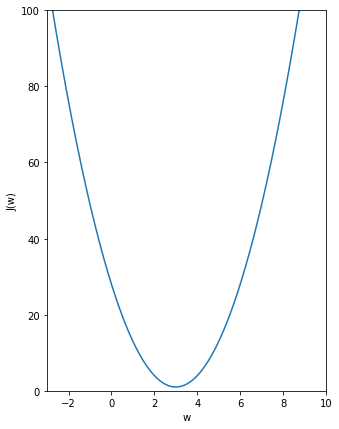

In [3]:
plt.figure(figsize=[5, 7])
w = np.arange(-3, 10, 0.01)
j = np.square(w - 3) * 3 + 1
plt.xlabel("w")
plt.ylabel("J(w)")
plt.xlim(-3, 10)
plt.ylim(0, 100)
plt.plot(w, j)

plt.show()

* 什么时候通过加上梯度值（乘以学习率）更新参数？  
> 目标函数要求极大值时，通过加上梯度值（乘以学习率）更新参数  
> 这种方法叫 **梯度上升法**。  

* 为什么要乘以学习率？   
梯度向量 $(1, 2)$ 和 $(10, 20)$ 表示同一个方向  

<img src="./imgs/2.learning_rate1.png" width="500px">  
<img src="./imgs/2.learning_rate2.png" width="500px">

##### 1.2.2.3 各种梯度下降的方法

* 批梯度下降BGD（Batch Gradient Descent） 
  
    * 将整个训练集计算梯度，更新参数，多次迭代。  
    * 计算慢，计算量随训练集的增大而增大，计算冗余。  
    * 新数据加入，需要重新计算，更新模型。  
    * 对于凸函数可以收敛到全局极小值，对于非凸函数可以收敛到局部极小值。  

* 随机梯度下降SGD（Stochastic Gradient Descent）  
  
    * 从训练集中**随机**抽出（有放回的）一条数据，计算梯度，更新参数，多次迭代。  
    * 计算快，更新参数快。  
    * 随机采样代表全训练集，新数据加入无需重新计算整个数据集。  
    * 噪声大，并不是每次迭代都向着整体最优化方向。虽然训练速度快，但是准确度下降，并不是全局最优。  
    * 更新比较频繁，会造成 $loss$ 有严重的震荡。    

* 小批量梯度下降MBGD（Mini-Batch Gradient Descent）  
小批量随机梯度下降 Mini-batch Stochastic Gradient Descent   
  
    * 从训练集中**随机**抽出（有放回的）长度为 $batch\_size$ 的Mini-Batch样本代表全样本， 计算梯度，更新参数，多次迭代  
    * 可以降低参数更新时的方差，收敛更稳定

<img src="./imgs/2.gradient_descent4.jpg" width="400px">

##### 1.2.2.4 超参数

* 只控制模型的训练过程
* 需要手动设置
* **超参数调优**：多次调整超参数的组合，获得使模型训练效果最好的超参数  
  
    * learning_rate
    * batch_size
    * epochs


**名词解释**

* batch_size: 每次从训练集随机抽取的mini-batch的样本数   
  
* step（Iteration）: 用一个mini-batch求梯度 更新一次参数，叫做one step(1步)  
  
* epoch: 将训练集的全部数据完整训练一次叫做一个epoch  
  
* steps_per_epoch: 一个epoch需要经过的step数。$\begin{aligned} steps\_per\_epoch = \frac{sample\_length} {batch\_size} \end{aligned}$

#### 1.2.3 问题

 * 什么时候用闭式解， 什么时候用梯度下降法 ？  
  
     *  一般特征数比较大，$X^T X$ 不可逆的时候  
     * 数据集较大，较复杂的时候，闭式解矩阵乘法和矩阵求逆<a href="https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra">运算量大</a>，梯度下降法更快  
         
         


### 1.3 Lasso(索套回归)和Ridge(岭回归)

#### 1.3.1 Overfitting 过拟合

##### 1.3.1.1 问题描述

过度拟合训练集，模型只在训练集表现很好，在测试集表现很糟。  
出现原因：  
* 数据过少
* 模型过复杂  

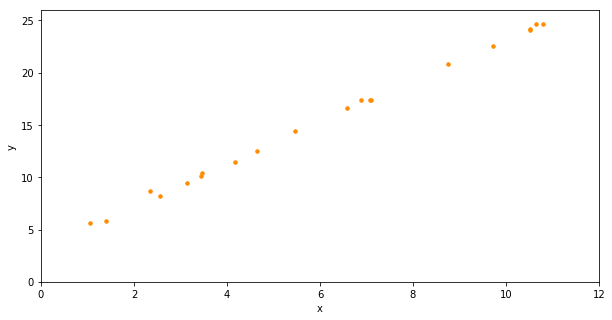

In [4]:
x = np.arange(1, 11, 0.01)
noise = np.random.randn(1000)
top_x = x[noise>2]
top_y = 2 * top_x + 1 + noise[noise>2]

# y = 2 * x + 1 + noise

plt.figure(figsize=[10, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 12))
plt.ylim((0, 26))
plt.scatter(top_x, top_y, s=12, c="darkorange")
plt.show()

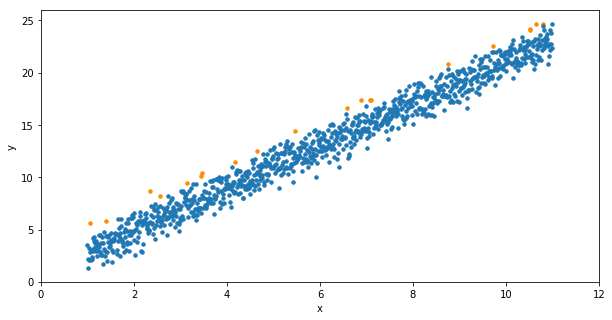

In [5]:
x = x[noise <= 2]
y = 2 * x + 1 + noise[noise<=2]

plt.figure(figsize=[10, 5])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 12))
plt.ylim((0, 26))
plt.scatter(top_x, top_y, s=12, c="darkorange")
plt.scatter(x, y, s=12)
plt.show()

##### 1.3.1.2 抑制过拟合的方法  
* 增加数据  
* 降维（特征选择、特征提取）  
* Regularize正则化 
* 降低模型复杂度  
* ~~集成学习~~  
* ~~Dropout~~    

#### 1.3.2 Regularize 正则化

原来的代价函数上加一项正则项（惩罚项penalty）与惩罚率 $\lambda$ 的乘积: $\lambda P(w)$ ，即：  
  
$\begin{aligned} J(w) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} + P(w) \end{aligned}$  
  
$\begin{aligned}
w \leftarrow w-\eta \frac{\partial J(w)}{\partial w}
\end{aligned}$
  
##### 1.3.2.1 范数
  
$L_p$ 范数：
$\begin{align*}
\| w \|_{p}=\sqrt[p]{\sum_{i}\left|w_{i}\right|^{p}} = \left(\left|w_{1}\right|^{p}+\left|w_{2}\right|^{p}+\cdots+\left|w_{n}\right|^{p}\right)^{\frac{1}{p}}
\end{align*}$             

   
   
$L_2$ 范数：
$\begin{align*}
\| w \|_{2}=\sqrt[2]{\sum_{i} w_i^2} =\left(\left|w_{1}\right|^{2}+\left|w_{2}\right|^{2}+\left|w_{3}\right|^{2}+\cdots+\left|w_{n}\right|^{2}\right)^{1 / 2}
\end{align*}$  

$L_1$ 范数：
$\begin{align*}
\| w \|_{1}={\sum_{i} |w_i|} =\left|w_{1}\right|+\left|w_{2}\right|+\left|w_{3}\right|+\cdots+\left|w_{n}\right| 
\end{align*}$  
  
##### 1.3.2.2 正则化  
L1正则(Lasso Regression)： $\begin{aligned} J(w, b) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} + ||w||_1 \end{aligned}$   
L2正则(Ridge Regression)： $\begin{aligned} J(w, b) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} + ||w||_2^2 \end{aligned}$ 

**结论**
* 原 loss function 加上 $L_1$ 正则项就是Lasso回归（索套回归）， 加上$L_2$ 正则项就是Ridge回归（岭回归）  
* Lasso和Ridge都可以一定程度抑制过拟合。  
* 岭回归用的多一点，效果好一点，且方便求解。 Lasso不方便求解  

#### 1.3.3 Ridge求解

Ridge Regression 岭回归，也叫权值衰减。  


$\begin{aligned} 
J(w, b) &= \sum_{i=1}^{m}\left(w^T x_{i}-y_{i}\right)^{2} + \lambda ||w||_2^2 \\ &= \sum_{i=1}^{m}\left(w^T x_{i}-y_{i}\right)^{2} + \lambda w^T w \\ &= \left(w^T X^T-y^T\right)(X w-y)+\lambda w^T w \\ &= w^T X^T X w -2w^T X^T y + y^T y + \lambda w^T w \\ &= w^T\left(X^T X+\lambda I\right) w-2 w^T X^T y^T y
\end{aligned}$   
  
$\begin{align}
\hat{w} &=\arg \min _{w} J(w) \\ &= w^T\left(X^T X+\lambda I\right) w-2 w^T X^T y^T y
\end{align}$

$\begin{aligned}
\frac{\partial J(w)}{\partial w} = 2\left(X^T X+\lambda I\right) w-2 X^T y=0
\end{aligned}$

解得 $\begin{align}
\hat{w^*}=\left(X^T X+\lambda I\right)^{-1} X^T Y
\end{align}$

#### 1.3.4 岭回归的特点

* 可以抑制过拟合。  
* 引入单位矩阵，半逆矩阵加上单位矩阵，**一定可逆**。  

#### 1.3.5 问题

* 1. 岭回归的“岭”指的是什么？  
> 岭回归中引入了单位矩阵，单位矩阵也叫对角矩阵。  
> 单位矩阵是一个方阵，对角线上的值全为 $1$ , 其他值全为 $0$。  
> 对角线就像山岭一样，岭回归因此得名。  

* 2. 正则化为什么能够抑制过拟合？
> **正则化的本质是给参数加上约束。**  
>  
> 如何求带约束的优化问题？  
    >> $\begin{aligned} J(w) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} \end{aligned}$   
    >>  
    >> $s.t: ||w||_2 ^2 < m $  
    >> 
    >> 构造拉格朗日函数：  
    >>  $\begin{aligned} L(w) = \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} + \lambda (||w||_2^2 - m) \end{aligned}$
   

* 3. 为什么L1正则会产生稀疏解？  
> $w = (1.2, 0, 0, 3.2, 0, 0, 6.3, 0)$  
>>  
> * 从解空间形状的角度看：   
>> <img src="./imgs/2.regularize1.png" width="550px">  
>> 
>> 假设只有两个特征，且没有偏置 $b$ 。   
>> 给 $w$ 加上约束： $w_1^2 + w_2^2 \leq m$
> * 贝叶斯先验角度
>> L1正则化相当于对模型参数 $w$ 引入了**拉普拉斯先验分布**，L2正则化引入了**高斯先验分布**。  
>>  
>> 而**拉普拉斯先验使参数为0的概率更大**。  
>>  
>> 
>> <img src="./imgs/2.Gaussian_distribution.png" width="500px"> 
>>  
>> 高斯分布(Gaussian distribution)：均值为 $\mu$ ，方差为 $\sigma$ ，记作：
$\begin{align}
X \sim N\left(\mu, \sigma^{2}\right)
\end{align}$  
>>  
>> 概率密度函数：
>> $\begin{align}
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
\end{align}$
>>  
>> <img src="./imgs/2.Laplace_distribution.png" width="500px">  
>>  
>>  
>> 拉普拉斯分布(Laplace distribution): 均值为 $\mu$ ，b > 0 是尺度参数  
>>  
>> 概率密度函数：
>> $\begin{align}
f(x \mid \mu, b)=\frac{1}{2 b} e^ {-\frac{|x-\mu|}{b}}
\end{align}$

* 4. Lasso有哪些求解方式？  
> 

#### 1.3.6 L1 vs L2

##### L1
* 产生稀疏解，可以做特征选择  
* 梯度分情况讨论，不能直接得到闭式解，也不能用梯度下降求解  

##### L2  
* 抑制过拟合效果更好  
* 可以直接得到闭式解，且**一定可以求逆**   
* 可以用梯度下降法求解  

### 1.4 概率视角看线性回归和岭回归  

#### 1.4.1 极大似然估计MLE（Maximum Likelihood Estimate）

$\begin{align}
y=f(w)+\varepsilon
\end{align}$    
  
$\begin{align}
\varepsilon \sim N\left(0,\sigma^{2}\right)
\end{align}$  
  
$\begin{align}
f(w)=w^{\top} X
\end{align}$  

$\begin{align}
y=w^{\top} X+\varepsilon
\end{align}$  

$\begin{align}
y \mid X ; w \sim N\left(w^{\top} X, \varepsilon ^2\right)
\end{align}$  
  
$\begin{align} P(y|X;w) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(y-w^{\top} X)^{2}}{2 \sigma^{2}}} \end{align}$

写出似然函数：  
$\begin{aligned}
L(w) &= log\left( P(y|X; w) \right) 
\\ &= log \prod_{i=1}^{m}P(y_i|x_i; w)  
\\ &= \sum_{i=1}^{m} log P(y_i|x_i; w) 
\\ &= \sum_{i=1}^{m} (log \frac{1}{\sigma \sqrt{2 \pi}}  - {\frac{(y_i - w^{\top} x_i)^{2}}{2 \sigma^{2}}})
\end{aligned}$  
  
$\begin{align}
\hat{w} &= \underset{w}{\arg \max} L(w) \\
&= \underset{w}{\arg \max} \sum_{i=1}^{m} (log \frac{1}{\sigma \sqrt{2 \pi}}  - {\frac{(y_i-w^{\top} x_i)^{2}}{2 \sigma^{2}}}) \\
&= \underset{w}{\arg \max} \sum_{i=1}^{m} -\frac{1}{2 \sigma^{2}}\left(y_{i}-w^{\top} x_{i}\right)^{2} \\
&= \underset{w}{\arg \min} \sum_{i=1}^{m} \left(y_{i}-w^{\top} x_{i}\right)^{2}
\end{align}$ 

##### 结论  
**最小二乘估计LSE等价于噪声服从高斯分布的MLE**

#### 1.4.2 贝叶斯角度 最大后验概率估计MAP（maximum a posteriori probability estimate）

Ridge

$\begin{align}
y=f(w)+\varepsilon
\end{align}$    
  
$\begin{align}
\varepsilon \sim N\left(0,\sigma^{2}\right)
\end{align}$   

$\begin{align}
y \mid X ; w \sim N\left(w^{\top} X, \varepsilon ^2\right)
\end{align}$  

$\begin{align} P(y \mid w) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(y-w^{\top} X)^{2}}{2 \sigma^{2}}} \end{align}$

$\begin{align}
w \sim N\left(0, \sigma_{0}^{2}\right)
\end{align}$  

$\begin{align} P(w) = \frac{1}{\sigma_0 \sqrt{2 \pi}} e^{-\frac{w^{2}}{2 \sigma_0 ^{2}}} \end{align}$


$\begin{align}
P(w \mid y) &= \frac{P(y|w) \cdot P(w)}{P(y)} 
\end{align}$

MAP： 
  
$\begin{align}
\begin{aligned}
\hat{w} &=\underset{w}{\arg \max}\  log P(w \mid y) \\
&=\underset{w}{\arg \max} \ log P(y \mid w) \cdot P(w) \\ 
&=\underset{w}{\arg \max} \ log \prod_{i=1}^{m} P(y_i \mid w) \cdot P(w) \\  
&=\underset{w}{\arg \max} \sum_{i=1}^{m} \ log\ P(y_i \mid w) + log\ P(w) \\
&=\underset{w}{\arg \max} \sum_{i=1}^{m} \ log \left(\frac{1}{\sigma \sqrt{2 \pi}} \cdot \frac{1}{\sigma_0 \sqrt{2 \pi}}\right) + ({-\frac{(y_i-w^{\top} x_i)^{2}}{2 \sigma^{2}}} {-\frac{w^{2}}{2 \sigma_0 ^{2}}}) \\
&=\underset{w}{\arg \max} \sum_{i=1}^{m}  ({-\frac{(y_i-w^{\top} x_i)^{2}}{2 \sigma^{2}}} {-\frac{w^{2}}{2 \sigma_0 ^{2}}}) \\
&=\underset{w}{\arg \min} \sum_{i=1}^{m}  ({\frac{(y_i-w^{\top} x_i)^{2}}{2 \sigma^{2}}} + {\frac{w^{2}}{2 \sigma_0 ^{2}}}) \\
&=\underset{w}{\arg \min} \sum_{i=1}^{m}  ({(y_i-w^{\top} x_i)^{2}} + {\frac{2 \sigma^{2}}{2 \sigma_0 ^{2}}} \cdot {w^{2}})
\end{aligned} 
\end{align}$ 

$\begin{align}
\hat{w}_{MAP} = \underset{w}{\arg \min} \sum_{i=1}^{m}  ({(y_i-w^{\top} x_i)^{2}} + {\frac{2 \sigma^{2}}{2 \sigma_0 ^{2}}} \cdot {w^{2}})
\end{align}$ 

##### 结论  
**L2正则化的最小二乘估计LSE等价于 噪声服从高斯分布、参数w先验也服从高斯分布的MAP**  
**同理可推，L1正则化的最小二乘估计LSE等价于 噪声服从高斯分布、参数w先验服从拉普拉斯分布的MAP**  

## 2. 算法复杂度

### 2.1 时间复杂度  

#### 2.1.1 线性回归闭式解

 $X$ 为 $ m \times (d + 1)$ 的矩阵

$\begin{aligned}
\hat{\boldsymbol{w}}^{*}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}
\end{aligned}$ 

|操作|input|output|时间复杂度|
|-|:-:|:-:|:-:|
|矩阵乘法|(n, m) * (m, p) |(n, p)|$O(nmp)$|
|求逆矩阵|(n, n)| (n, n)|$O(n^3)$| 

$ O(m \cdot (d+1)^2) = O(m \cdot (d+1)^2) + O((d+1)^3) + O((d+1)^2 \cdot m) + O((d+1) \cdot m) $

#### 2.1.3 Ridge闭式解

 $\begin{align}
\hat{w}=\left(X^T X+\lambda I\right)^{-1} X^T Y
\end{align}$

$ O(m \cdot (d+1)^2) = O(m \cdot (d+1)^2) +  O((d+1) ^ 2) + O((d+1)^3) + O((d+1)^2 \cdot m) $

### 2.2 空间复杂度  

#### 2.2.1 线性回归闭式解

$O(m \cdot (d+1)) = O(X) + O(y) + O(w) =  O(m \cdot (d+1)) + O(m) + O(d+1)$

#### 2.2.2 Ridge闭式解

$O(m \cdot (d+1)) = O(X) + O(y) + O(w) + O(I) =  O(m \cdot (d+1)) + O(m) + O(d+1) + O((d+1)^2)$

## 3. 优缺点及其他特点

### 3.1 优点  
1. 实现简单  
2. 效果稳定  
  
### 3.2 缺点：
1. 计算复杂度高  
2. 只能实现线性拟合  
  
### 3.3 其他
1. 属于监督学习  
2. 是一种线性模型  
3. 是一种参数模型  

## 4. 优化空间

### 4.1 多项式回归

$\begin {aligned}
f(x) = a x^2 + b x + c
\end {aligned}$

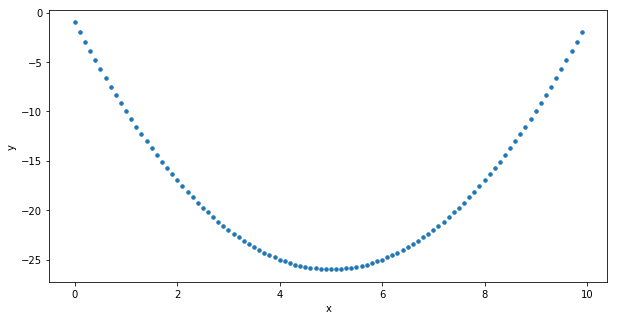

In [21]:
def show_func_points(func, x_start=0, x_stop=10, x_step=0.01):
    x = np.arange(x_start, x_stop, x_step)
    y = func(x)
    plt.figure(figsize=[10, 5])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x, y, s=12)
    plt.show()

show_func_points(func=lambda x: np.square(x) - 10 * x - 1, x_step=0.1)

### 4.2 局部加权线性回归 Locally Weighted Linear Regression，LWLR

#### 4.2.1 欠拟合underfitting

模型在训练集上拟合的不好，在测试集上也拟合的不好。  

#### 4.2.2 原理

预测过程，给每个点一个权值，离待预测点越近的点权值越大，优先优化权值大的点。  
LWLR使用“核”来对附近的点赋予更高的权重，一般采用高斯核（Gaussian kernel，也叫径向基函数核 Radial basis function kernel，RBF kernel）计算，  
公式： $\begin{align}
w(i, i)=\exp \left(\frac{||x^{(i)}-x||_{2} ^ 2}{-2 k^{2}}\right)
\end{align}$

#### 4.2.3 求解

$
\begin{align}
J(a, b)= \sum_{i=1}^{N} w_{i}\left(y_{i}-a x_{i}-b\right)^{2}
\end{align}
$

$\begin{align}
\hat{a}^*=\left( X ^{ T } W X \right)^{-1} X ^{ T } W y
\end{align}$

## 总结

1. 最小二乘法
    > * 使残差平方和最小   
    > * 几何意义：使预测值和真实值的欧式距离之和最小   
    > * 目标函数：$\begin{aligned} J(w, b) = \sum_{i=1}^{m}\left(y_{i} - w x_{i}-b\right)^{2} \end{aligned}$   
    > * $\begin{aligned} (w^{*}, b^{*}) =\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(y_{i} - w x_{i}-b\right)^{2} \end{aligned}$  
    >  
    > * 闭式解：$\begin{aligned}
{w^*}=\frac{\sum_{{i}=1}^{{m}} {y}_{{i}}\left({x}_{{i}}-\overline{{x}}\right)}{\sum_{{i}=1}^{{m}} {x}_{{i}}^{2}-\frac{1}{{m}}\left(\sum_{{i}=1}^{{m}} {x}_{{i}}\right)^{2}}
\end{aligned}$   
> $\begin{aligned} {b^*}=\frac{1}{{m}} \sum_{{i}=1}^{{m}}\left({y}_{{i}}-{w} {x}_{{i}}\right) \end{aligned}$   
    >  
    > * 矩阵形式，将 $b$ 纳入 $w$ 记作 $\hat{w}$ ，将 $X$ 添加一列，全部填充为 $1$ 
    > * 矩阵形式闭式解：$\begin{aligned}
\hat{\boldsymbol{w}}^{*}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}
\end{aligned}$  
  
2. 梯度下降法：
    > * 梯度：关于目标函数  𝐽(𝑤,𝑏)  的偏导数组成的向量   
    > * 目标函数：$\begin{aligned}
J(w, b) = \sum_{{i}=1}^{{m}}(wx_i + b - y_i)^2
\end{aligned}$    
    > * 梯度：$\begin{aligned}
\frac{\partial J({w}, {b})}{\partial {w}} = 2\sum_{{i}=1}^{m}(wx_i + b - y_i)x_i
\end{aligned}$   
    > $\begin{aligned}
\frac{\partial J({w}, {b})}{\partial {b}} = 2\sum_{{i}=1}^{m}(wx_i + b - y_i)
\end{aligned}$  
    > * 更新梯度：$\begin{aligned}
w \leftarrow w-\eta \frac{\partial J(w, b)}{\partial w}
\end{aligned}$  
    >  
    > $\begin{aligned}
b \leftarrow b-\eta \frac{\partial J(w, b)}{\partial b}
\end{aligned}$   
    >  
    > * BGD、SGD、MBGD

3. 正则化：
    > * 正则化公式：$\begin{aligned}
J(w) = L(w) + \lambda P(w)
\end{aligned}$  
    > $L(w)$是Loss function，$P(w)$ 是penalty function   
    >   
    > * 范数公式：$\begin{align*}
\| w \|_{p}=\sqrt[p]{\sum_{i}\left|w_{i}\right|^{p}} = \left(\left|w_{1}\right|^{p}+\left|w_{2}\right|^{p}+\cdots+\left|w_{n}\right|^{p}\right)^{\frac{1}{p}}
\end{align*}$   
    > * Lasso索套回归: $P(w) = ||w||_1$  
    > * Ridge岭回归（权值衰减）：  $P(w) = ||w||_2 ^ 2$  
    > 
    >  
    > * Ridge目标函数：$\begin{aligned} 
J(w, b) &= \sum_{i=1}^{m}\left(w^T x_{i}-y_{i}\right)^{2} + \lambda ||w||_2^2 \\ &= w^T\left(X^T X+\lambda I\right) w-2 w^T X^T y^T y
\end{aligned}$  
    > * Ridge矩阵形式闭式解：$\begin{align}
\hat{w^*}=\left(X^T X+\lambda I\right)^{-1} X^T Y
\end{align}$   
    > 
    > * Lasso vs. Ridge：  
    > Lasso不能求闭式解也不能直接梯度下降法求解，但是Lasso可以产生稀疏解，可用于特征选择；
    > Ridge都可以，且一定可逆，且效果更好。
    > 
    > * 为什么正则化能够抑制过拟合？
    > 正则化的本质是给参数加上约束。降低了模型的复杂度。
    > * 为什么l1正则可以产生稀疏解？  
    > 答：从解空间的形状看，l2的解空间是圆形，l1的解空间是多边形，多边形的解空间更容易在尖角处与等位线碰撞出稀疏解。从贝叶斯先验看，l2的参数w服从高斯分布，l1的参数w服从拉普拉斯分布，拉普拉斯分布在0点处是一个尖峰，所以参数w取值为0的可能性更高。

4. 概率视角：
    > * 线性回归 极大似然估计：最小二乘估计LSE等价于噪声服从高斯分布的MLE   
    > * Lasso、Ridge贝叶斯视角 最大后验估计：  
    > L2正则化的最小二乘估计LSE等价于 噪声服从高斯分布、参数w先验也服从高斯分布的MAP  
    > L1正则化的最小二乘估计LSE等价于 噪声服从高斯分布、参数w先验服从拉普拉斯分布的MAP  

5. 算法复杂度
    > * $X$ 为 $ m \times (d + 1)$ 的矩阵
    > * 时间复杂度（闭式解，线性回归和Ridge同）：  
    > $ O(m(d+1)^2)$
    > * 空间复杂度（闭式解，线性回归和Ridge同）：
    > $ O(m(d+1))$

5. 优化
    > * 多项式回归
    >> * 转化为特征工程问题
    > * 局部加权线性回归LWLR  
    >>  * 求距离一般采用高斯核：$\begin{align}
w(i, i)=\exp \left(\frac{||x^{(i)}-x||_{2} ^ 2}{-2 k^{2}}\right)
\end{align}$
    >> * 目标函数：$
\begin{align}
J(a, b)= \sum_{i=1}^{N} w_{i}\left(y_{i}-a x_{i}-b\right)^{2}
\end{align}
$  
    >> * 向量形式解： $\begin{align}
\hat{a}^*=\left( X ^{ T } W X \right)^{-1} X ^{ T } W y
\end{align}$

6. 名词  
    > 过拟合、欠拟合  
    > 梯度、学习率learning_rate、超参数、epochs、mini-batch、batch-size、step、正则系数  
    

## 相关链接   
  
<a href="./02.2.LinearRegression-sklearn.ipynb" style=""> 2.2 sklearn中使用线性回归、岭回归、Lasso、SGD、多项式回归  </a>  
<a href="./02.3.LinearRegression-numpy.ipynb" style=""> 2.3 numpy实现线性回归、岭回归、SGD回归、LWLR</a>  
<a href="./02.4.LinearRegression-tf2.ipynb"> 2.4 TensorFlow2实现线性回归、岭回归、SGD回归、LWLR</a>  
<a href="./02.5.LinearRegression-torch1.ipynb"> 2.5 PyTorch1实现线性回归、岭回归、SGD回归、LWLR </a>  

## 参考文献

<a href="https://book.douban.com/subject/24703171/">[1] [M]Peter Harrington[美]. 机器学习实战. 北京: 人民邮电出版社, 2013.6.</a>  
<a href="https://book.douban.com/subject/26708119/">[2] [M]周志华. 机器学习. 北京: 清华大学出版社, 2016.1.</a>  
<a href="https://book.douban.com/subject/30285146/">[3] [M]诸葛越, 葫芦娃. 百面机器学习. 北京: 人民邮电出版社, 2018.8.1.</a>

https://www.experfy.com/blog/gradient-descent/  
https://datawhalechina.github.io/pumpkin-book/#/chapter3/chapter3  
https://blog.csdn.net/pxhdky/article/details/82960659  
https://www.cnblogs.com/guoyaohua/p/8542554.html  
https://zh.wikipedia.org/wiki/最小二乘法  
https://zh.wikipedia.org/wiki/正态分布  
https://zh.wikipedia.org/wiki/拉普拉斯分布   
https://github.com/dragen1860/Deep-Learning-with-TensorFlow-book  